In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz
from sklearn import tree
from mlxtend.plotting import plot_decision_regions


In [6]:
data = pd.read_csv(r"C:\Users\jc441264\OneDrive - James Cook University\Documents\Scripts\micronirsim.csv")
data.drop(data[data['site'] == 'PNQ'].index, inplace = True)
data.drop(data[data['site'] == 'GB'].index, inplace = True)

data.drop(data[data['species'] == 'COLOMA'].index, inplace = True)
# data.drop(data[data['species'] == 'COLOMA'].index, inplace = True)
labels = list(set(data['species']))

data['species'].value_counts()

YCA      50
GTA      50
COLO     50
CAMPO    50
SMBLA    50
Name: species, dtype: int64

In [7]:
labels



['GTA', 'CAMPO', 'SMBLA', 'COLO', 'YCA']

In [8]:
# data = pd.read_csv(r"C:\Users\Rosco\OneDrive - James Cook University\Documents\Scripts\bruker_nm.csv")

# data.drop(data[data['site'] == 'NATIVE'].index, inplace = True)


label_map = {'COLO': 0, 'CAMPO': 1, 'SMBLA':2, 'YCA':4, 'COLOMA':5, 'GTA':6}
data['species'] = data['species'].map(label_map)

y = data['species'].to_numpy()
X = data.values[:,5:].astype(float)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94        17
           2       0.88      0.94      0.91        16
           4       0.94      0.89      0.91        18
           6       1.00      0.83      0.91        12

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



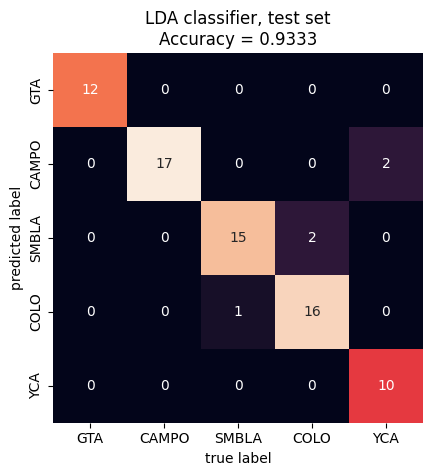

c:\Users\jc441264\AppData\Local\anaconda3\envs\py_env\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


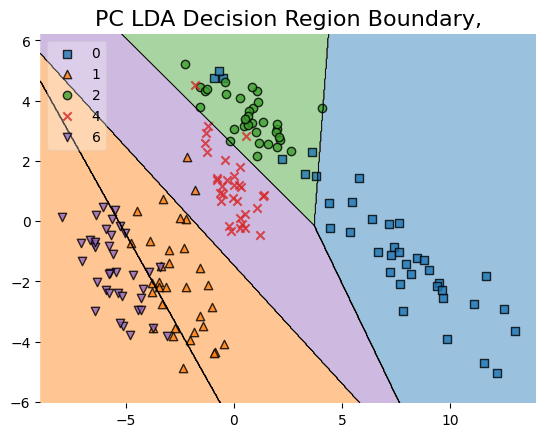

In [9]:
# Linear discriminant analysis 

test_train_state = np.random.randint(1,1000000)

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create  and trainmodel
lda = LDA(n_components=1)
lda.fit_transform(X_train,y_train)

# model metrics 
y_pred = lda.predict(X_test)
accuracy = lda.score(X_test,y_test)
report = classification_report(y_test, y_pred)


# create confusion matrix
lda_preds = lda.predict(X_test) 
print(report)


mat = confusion_matrix(y_test, lda_preds)
a = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="rocket",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('LDA classifier, test set\nAccuracy = %0.4f'%( accuracy))
plt.show(a)


clf=lda
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
b=clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('PC LDA Decision Region Boundary,', size=16)
plt.show(b)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       0.88      0.88      0.88         8

    accuracy                           0.93        27
   macro avg       0.95      0.95      0.95        27
weighted avg       0.93      0.93      0.93        27



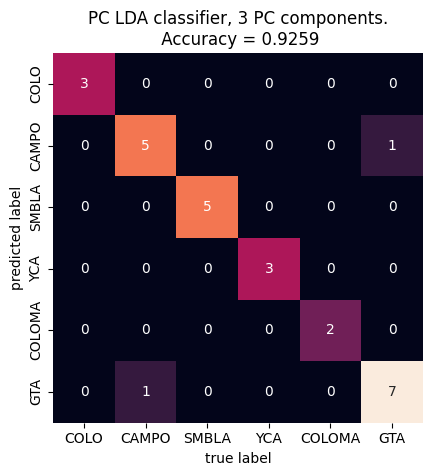

C:\Users\Rosco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


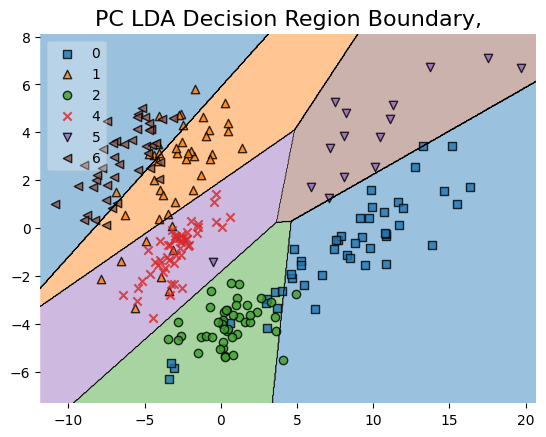

In [105]:
# PCA + Linear discriminant analysis 
no_pcs = 3

# PCA tranforma data
pca = PCA(n_components=no_pcs)
Xpc = pca.fit_transform(X)


#test train split
X_train, X_test, y_train, y_test = train_test_split(Xpc, y, test_size=0.1, random_state=None)

#create  and trainmodel
lda = LDA(n_components=1)
lda.fit_transform(X_train,y_train)

#predict test set
y_pred = lda.predict(X_test)
accuracy = lda.score(X_test,y_test)
report = classification_report(y_test, y_pred)


# create confusion matrix
lda_preds = lda.predict(X_test) 


print(report)

mat = confusion_matrix(y_test, lda_preds)
a= sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('PC LDA classifier, %d PC components.\n Accuracy = %0.4f'%(no_pcs, accuracy))
plt.show(a)


clf=lda
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
b=clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('PC LDA Decision Region Boundary,', size=16)
plt.show(b)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.71      0.71      0.71        14
           2       1.00      0.75      0.86         8
           4       0.90      0.75      0.82        12
           5       0.50      0.50      0.50         2
           6       0.70      0.88      0.78         8

    accuracy                           0.80        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.81      0.80      0.80        54



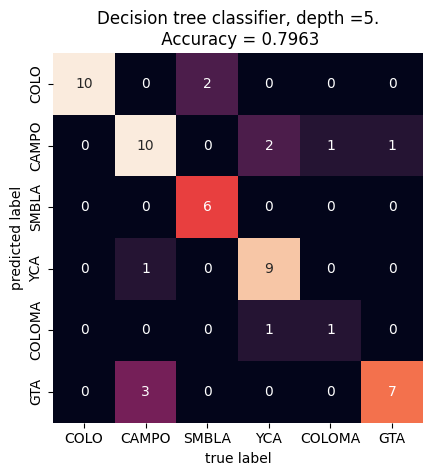

C:\Users\Rosco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


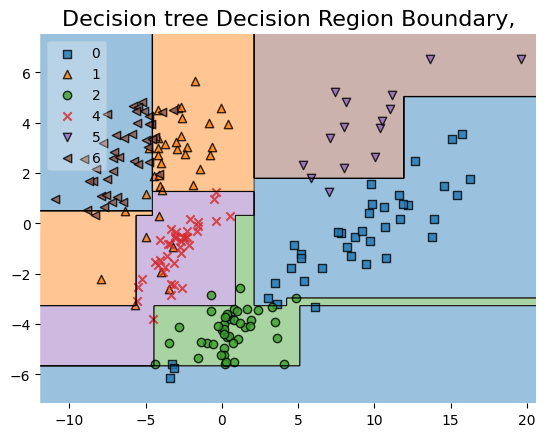

In [106]:
# Descision Tree Classifier

tree_depth = 5

# test train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
  
# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = tree_depth).fit(X_train, y_train)
accuracy = dtree_model.score(X_test, y_test)

# creating a confusion matrix
y_pred = dtree_model.predict(X_test)
report = classification_report(y_test, y_pred)


print(report)

mat = confusion_matrix(y_test, y_pred)
a = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Decision tree classifier, depth =%d.\n Accuracy = %0.4f'%(tree_depth, accuracy))
plt.show(a)

clf=dtree_model
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
b=clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Decision tree Decision Region Boundary,', size=16)
plt.show(b)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        16

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



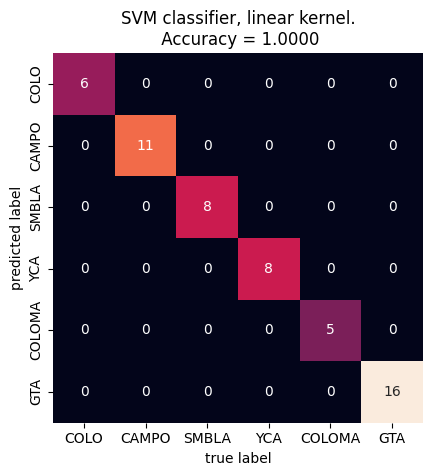

C:\Users\Rosco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


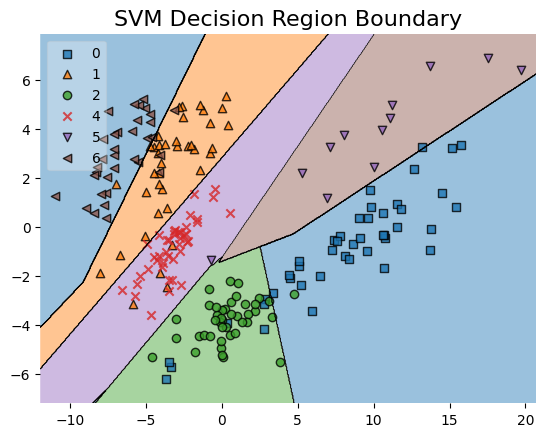

In [107]:
# Support vector machine

kernel = 'linear'

# test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

#fit model
svm = SVC(kernel = kernel, C = 1).fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)


print(report)
# confusion matrix
mat = confusion_matrix(y_test, y_pred)
a = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM classifier, ' + kernel + ' kernel.\n Accuracy = %0.4f'%(accuracy))
plt.show(a)


clf=svm
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
b=clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('SVM Decision Region Boundary', size=16)
plt.show(b)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.36      0.50        11
           2       1.00      0.88      0.93         8
           4       0.75      1.00      0.86        12
           5       1.00      1.00      1.00         1
           6       0.75      0.92      0.83        13

    accuracy                           0.83        54
   macro avg       0.88      0.86      0.85        54
weighted avg       0.84      0.83      0.82        54



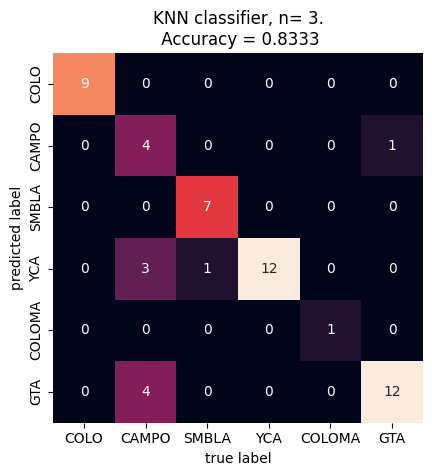

C:\Users\Rosco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


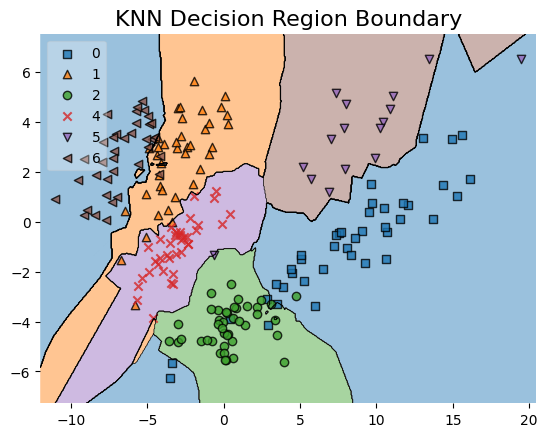

In [108]:
#  KNN classifier

n_neighbours = 3

#test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

#fit model

knn = KNeighborsClassifier(n_neighbors = n_neighbours).fit(X_train, y_train)
  
# accuracy on X_test
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
report = classification_report(y_test, y_pred)

#confusion matrix
print(report)
mat = confusion_matrix(y_test, y_pred)
a = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('KNN classifier, n= %d.\n Accuracy = %0.4f'%(n_neighbours, accuracy))
plt.show(a)


clf = knn
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

clf.fit(X_train2, y_train)
b= plot_decision_regions(X_train2, y_train, clf=clf, legend=2)


plt.title('KNN Decision Region Boundary', size=16)

plt.show(b)



C:\Users\Rosco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


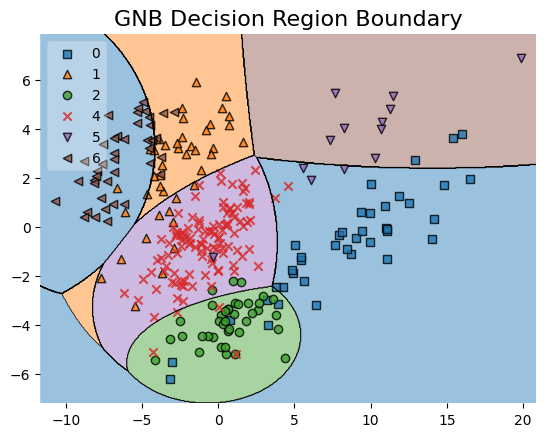

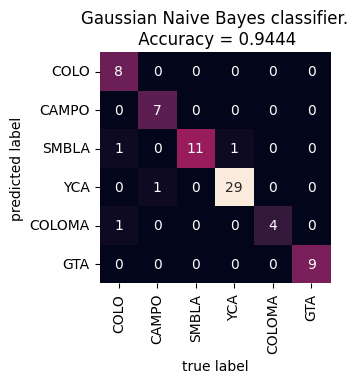

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.88      0.93         8
           2       0.85      1.00      0.92        11
           4       0.97      0.97      0.97        30
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         9

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.93        72
weighted avg       0.95      0.94      0.94        72



In [35]:
# Gaussian Naive Bayes 


# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train the classifier:
gnb = GaussianNB().fit(X_train, y_train)

# Make predictions with the classifier:
y_pred = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test)
report = classification_report(y_test, y_pred)



clf=gnb
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
gnb.fit(X_train2, y_train)
a =plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.title('GNB Decision Region Boundary', size=16)
plt.show(a)

plt.figure(figsize=(3,3))

mat = confusion_matrix(y_test, y_pred)
b= sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Gaussian Naive Bayes classifier.\n Accuracy = %0.4f'%(accuracy))
plt.show(b)
print(report)





In [ ]:
TEST ZONE

Text(0.5, 1.0, 'GNB Decision Region Boundary, test set')

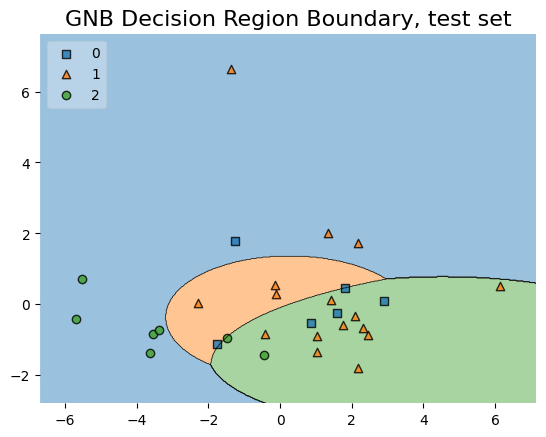

In [72]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

clf = GaussianNB().fit(X_train, y_train)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)

clf.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=clf, legend=2)


plt.title('GNB Decision Region Boundary, test set', size=16)

Text(0.5, 1.0, 'KNN Decision Region Boundary, test set')

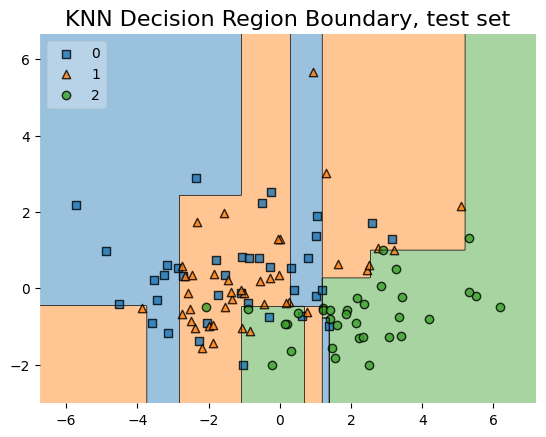

In [71]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

clf = DecisionTreeClassifier(max_depth = tree_depth).fit(X_train, y_train)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)

clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)


plt.title('KNN Decision Region Boundary, test set', size=16)

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
# create loocv procedure
cv = LeaveOneOut()

#build multiple linear regression model
model = SVC(kernel = 'linear', C = 0.5)

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f' % np.average(scores))

Accuracy: 0.976


In [13]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.